# TelePyth Manual: Advanced

[Beginner's guide](telepyth-basics.ipynb) introduced some basics:
* setting a token `%telepyth -t <token>`, 
* sending a message `%telepyth 'Wow, such magic'`.

In this tutorial we will learn 
* how to avoid storing the token in your notebook under SVC,
* the difference between line and cell magic,
* lazy notifications,
* how to send traceback of an exception,
* how to put a message together,
* hot to send a plot.

The easiest way to avoid setting a token repeatedly across notebooks and sharing it publicly is to create `.telepythrc` file in your home directory. It should look like this:

In [ ]:
[telepyth]
token = 3916589616287113937

Once `telepyth` package is imported, it tries to load settings from `.telepythrc`.

In [1]:
import telepyth

Use token from .telepythrc.


Actually `telepyth` provides both line magic and cell magic. The visual difference is in the number of `%` symbols. In fact, line magic performs only statements in the same line after `%telepyth`, cell magic runs lines below `%%telepyth` as well.

In [2]:
%telepyth 'line magic'

'line magic'

In [3]:
%%telepyth 'cell magic'
'some code here'

'cell magic'

'some code here'

Too lazy to write a notification message? No problem. `telepyth` magic could be used without any statements. In this case `telepyth` notifies a user with a simple message

```
Done.
```

This helps tracking some routine operations.

In [4]:
%telepyth

Line magic as well as cell magic allows to catch exceptions and notify user with their tracebacks.

In [5]:
%%telepyth raise Exception('in title.')
raise Exception('in cell')

Exception: in title.

Exception: in cell

Another benefit of `telepyth` is that you can construct notification message from title and body.

Title is the result of execution of a line statement.
Similarly, body is the result of execution of a whole cell.

See synthetic example below.

In [6]:
%%telepyth ' '.join(('Title', 'message'))
forty_two = '42'
pi = 3.1415926
int(forty_two) / pi  # approximatly 13

'Title message'

13.369015447770026

To send figures use TelePyth Client like this:

200

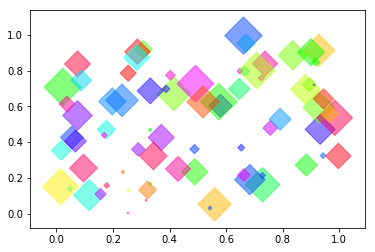

In [7]:
from telepyth import TelepythClient
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

tp = TelepythClient()
N = 75
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x, y, s=area, c=colors, marker='D', cmap='hsv', alpha=0.5)
tp.send_figure(fig, 'Diamonds!')

To check `telepyth` client version:

In [8]:
%telepyth -v

telepyth v0.1.5
Telegram notification with IPython magics.
(c) Daniel Bershatsky <daniel.bershatsky@skolkovotech.ru>, 2017


The previous command also returns `telepyth` object that can be accessed directly. More options are avaliable with command

In [9]:
%telepyth?